Run the GLM on the Matlab stuff and see what I get

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import io as sio
import statsmodels.api as sm
from matplotlib import gridspec
from matplotlib import pyplot as plt

In [2]:
sns.set(color_codes=True)
%matplotlib inline

In [3]:
#/data1/guilimin/abide/subtype/sc7/srs_maybe_ref_full_pruned_old/

In [4]:
#w_path = '/data1/guilimin/abide/subtype/sc12/full_maybe_old/sbt_weights_net_{}.csv'
#m_path = '/data1/guilimin/abide/pheno/sc12/model_full_maybe_sc12.csv'

In [5]:
w_path = '/data1/guilimin/abide/subtype/sc7/full_maybe/sbt_weights_net_{}.csv'
m_path = '/data1/guilimin/abide/pheno/sc7/model_full_maybe_sc7.csv'

In [6]:
#w_path = '/data1/guilimin/abide/subtype/sc7/srs_maybe_ref_full_pruned/sbt_weights_net_{}.csv'
#m_path = '/data1/guilimin/abide/pheno/sc7/model_srs_maybe_sc7_ref_full_pruned.csv'

In [7]:
# Model
cov = 'DX_GROUP'
model = pd.read_csv(m_path)
# Control = 0, ASD = 1
model.DX_GROUP = (model.DX_GROUP-2)*-1

In [8]:
scale = 7
sbt = 5
for net_id in np.arange(scale):
    # Weights
    weights = pd.read_csv(w_path.format(net_id+1))
    # Give subject column a name
    weights.rename(columns={' ':'SUB_ID'}, inplace=True)
    # Drop whitespace 
    weights.columns = weights.columns.str.strip(' ')
    # Get back to normal names
    weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)
    # Bring both of them together
    merged = pd.merge(model, weights, on='SUB_ID', how='inner')
    
    for sbt_id in np.arange(sbt):
        # Get the matrices
        sbt_name = 'sub{}'.format(sbt_id+1)
        y = merged[[sbt_name]]
        x = merged[[cov]]
        x['Intercept'] = np.ones(x.shape[0])
        
        m = sm.OLS(y, x)
        results = m.fit()
        
        eff = np.sqrt(results.rsquared)
        var = results.rsquared
        pval = results.pvalues[cov]
        
        patients = merged[merged.DX_GROUP==1][sbt_name]
        controls = merged[merged.DX_GROUP==0][sbt_name]
        pat_std = np.std(patients)
        ctr_std = np.std(controls)
        n_pat = len(patients)
        n_ctr = len(controls)
        pooled_std = np.sqrt(((n_pat-1)*np.square(pat_std) + (n_ctr-1)*np.square(ctr_std))/(n_pat + n_ctr - 2))

        cohensd = np.abs((np.mean(patients) - np.mean(controls)) / pooled_std)
        
        print('Net {} sbt {} eff: {:.3f}, var: {:.3f} p: {:.3f} cohens: {:.3f}'.format(net_id+1, sbt_id+1, eff, var, pval, cohensd))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:11: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Net 1 sbt 1 eff: 0.067, var: 0.004 p: 0.111 cohens: 0.134
Net 1 sbt 2 eff: 0.148, var: 0.022 p: 0.000 cohens: 0.299
Net 1 sbt 3 eff: 0.083, var: 0.007 p: 0.049 cohens: 0.166
Net 1 sbt 4 eff: 0.001, var: 0.000 p: 0.978 cohens: 0.002
Net 1 sbt 5 eff: 0.144, var: 0.021 p: 0.001 cohens: 0.292
Net 2 sbt 1 eff: 0.083, var: 0.007 p: 0.048 cohens: 0.167
Net 2 sbt 2 eff: 0.028, var: 0.001 p: 0.502 cohens: 0.056
Net 2 sbt 3 eff: 0.045, var: 0.002 p: 0.284 cohens: 0.090
Net 2 sbt 4 eff: 0.040, var: 0.002 p: 0.342 cohens: 0.080
Net 2 sbt 5 eff: 0.212, var: 0.045 p: 0.000 cohens: 0.433
Net 3 sbt 1 eff: 0.124, var: 0.015 p: 0.003 cohens: 0.249
Net 3 sbt 2 eff: 0.118, var: 0.014 p: 0.005 cohens: 0.238
Net 3 sbt 3 eff: 0.066, var: 0.004 p: 0.117 cohens: 0.132
Net 3 sbt 4 eff: 0.090, var: 0.008 p: 0.033 cohens: 0.180
Net 3 sbt 5 eff: 0.007, var: 0.000 p: 0.863 cohens: 0.014
Net 4 sbt 1 eff: 0.064, var: 0.004 p: 0.130 cohens: 0.128
Net 4 sbt 2 eff: 0.065, var: 0.004 p: 0.122 cohens: 0.130
Net 4 sbt 3 ef

In [9]:
investigate = ((1,5), (2,4), (3,3))

In [19]:
cov = 'FD_scrubbed'
# Look for motion
for inv in investigate:
    network, subtype = inv
    # Weights
    weights = pd.read_csv(w_path.format(network))
    # Give subject column a name
    weights.rename(columns={' ':'SUB_ID'}, inplace=True)
    # Drop whitespace 
    weights.columns = weights.columns.str.strip(' ')
    # Get back to normal names
    weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)
    # Bring both of them together
    merged = pd.merge(model, weights, on='SUB_ID', how='inner')
    
    # Get the matrices
    sbt_name = 'sub{}'.format(subtype)
    y = merged[[sbt_name]]
    x = merged[[cov]]
    x['Intercept'] = np.ones(x.shape[0])

    m = sm.OLS(y, x)
    results = m.fit()

    eff = np.sqrt(results.rsquared)
    var = results.rsquared
    pval = results.pvalues[cov]

    #print('net {} sub {}'.format(network, subtype))
    #print(results.summary())
    print('net {} sub {} p {:.3f} var {:.3f} eff {:.3f}'.format(network,
                                                   subtype,
                                                   pval,
                                                   var,
                                                   eff))

net 1 sub 5 p 0.397 var 0.001 eff 0.036
net 2 sub 4 p 0.293 var 0.002 eff 0.044
net 3 sub 3 p 0.490 var 0.001 eff 0.029


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:12: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:17: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


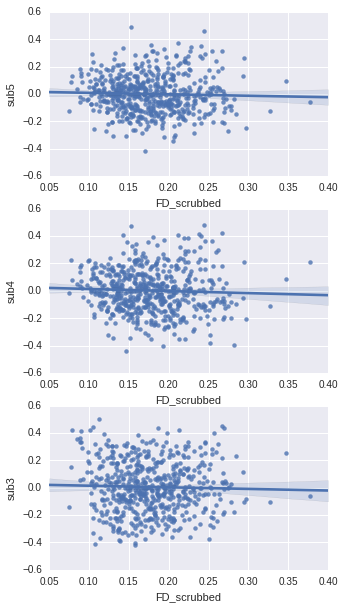

In [21]:
cov = 'FD_scrubbed'
# Look for motion
fig = plt.figure(figsize=(5,10))
gs = gridspec.GridSpec(len(investigate), 1, hspace=0.2)

for ids, inv in enumerate(investigate):
    ax = fig.add_subplot(gs[ids, 0])
    network, subtype = inv
    sbt_name = 'sub{}'.format(subtype)
    # Weights
    weights = pd.read_csv(w_path.format(network))
    # Give subject column a name
    weights.rename(columns={' ':'SUB_ID'}, inplace=True)
    # Drop whitespace 
    weights.columns = weights.columns.str.strip(' ')
    # Get back to normal names
    weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)
    # Bring both of them together
    merged = pd.merge(model, weights, on='SUB_ID', how='inner')

    tmp = sns.regplot(x="FD_scrubbed", y=sbt_name, data=merged, ax=ax)

In [12]:
merged.columns

Index(['SUB_ID', 'AGE_AT_SCAN', 'FD_scrubbed', 'DX_GROUP', 'dummie_KKI',
       'dummie_LEUVEN_1', 'dummie_MAX_MUN', 'dummie_NYU', 'dummie_OHSU',
       'dummie_OLIN', 'dummie_PITT', 'dummie_SBL', 'dummie_SDSU',
       'dummie_STANFORD', 'dummie_TRINITY', 'dummie_UCLA_1', 'dummie_UCLA_2',
       'dummie_UM_1', 'dummie_USM', 'dummie_YALE', 'sub1', 'sub2', 'sub3',
       'sub4', 'sub5'],
      dtype='object')

In [13]:
print('net {} sub {} p {:.3f} var {:.3f} eff {:.3f}'.format(network,
                                                   subtype,
                                                   pval,
                                                   var,
                                                   eff))

net 3 sub 3 p 0.490 var 0.001 eff 0.029
